# Neural IBM1 - Task 4

In [1]:
#imports
import tensorflow as tf
import numpy as np
from pprint import pprint
import pickle
from statstracker import StatsTracker
%pylab inline
from utils import smart_reader, bitext_reader, iterate_minibatches, prepare_data
from vocabulary import OrderedCounter, Vocabulary

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Get vocab
train_e_path = 'data/training/hansards.36.2.e.gz'
train_f_path = 'data/training/hansards.36.2.f.gz'
dev_e_path = 'data/validation/dev.e.gz'
dev_f_path = 'data/validation/dev.f.gz'
dev_wa = 'data/validation/dev.wa.nonullalign'
test_e_path = 'data/test/test.e.gz'
test_f_path = 'data/test/test.f.gz'
test_wa = 'data/test/test.wa.nonullalign'

max_tokens=1000

corpus_e = smart_reader(train_e_path)
vocabulary_e = Vocabulary(corpus=corpus_e, max_tokens=max_tokens)
# pickle.dump(vocabulary_e, open("vocabulary_e.pkl", mode="wb"))

corpus_f = smart_reader(train_f_path)
vocabulary_f = Vocabulary(corpus=corpus_f, max_tokens=max_tokens)
# pickle.dump(vocabulary_f, open("vocabulary_f.pkl", mode="wb"))

test_corpus = list(bitext_reader(
            smart_reader(test_e_path),
            smart_reader(test_f_path)))

In [3]:
#Get model for Task 4
from neuralibm1_T4 import NeuralIBM1Model_T4

# check neuralibm1trainer.py for the Trainer code
from neuralibm1trainer import NeuralIBM1Trainer_T2_gate

Task 4
Training with B=128 max_length=30 lr=0.001 lr_decay=0.0
Initializing variables..
Training started..
Shuffling training data
Iter   100 loss 58.940689 accuracy 0.19 lr 0.001000
Iter   200 loss 47.137703 accuracy 0.23 lr 0.001000
Iter   300 loss 47.350735 accuracy 0.25 lr 0.001000
Iter   400 loss 42.452496 accuracy 0.29 lr 0.001000
Iter   500 loss 45.130802 accuracy 0.29 lr 0.001000
Iter   600 loss 42.608448 accuracy 0.29 lr 0.001000
Iter   700 loss 40.410774 accuracy 0.31 lr 0.001000
Iter   800 loss 39.008316 accuracy 0.31 lr 0.001000
Iter   900 loss 42.024105 accuracy 0.30 lr 0.001000
Iter  1000 loss 38.910683 accuracy 0.29 lr 0.001000
Iter  1100 loss 47.601585 accuracy 0.28 lr 0.001000
Iter  1200 loss 44.257721 accuracy 0.28 lr 0.001000
Iter  1300 loss 40.090897 accuracy 0.29 lr 0.001000
Epoch 1 loss 45.257827 accuracy 0.27 val_aer 1.00 val_acc 0.26
Model saved in file: C:\Users\Noxeus\Sync\universiteit\MSc\Jaar 1\Natural Language Processing 2\nlp2\project 3\model.ckpt
Shufflin

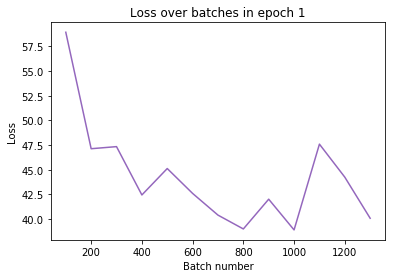

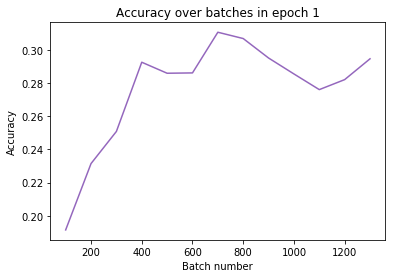

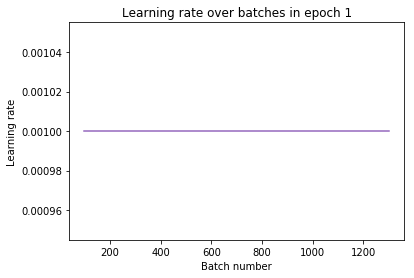

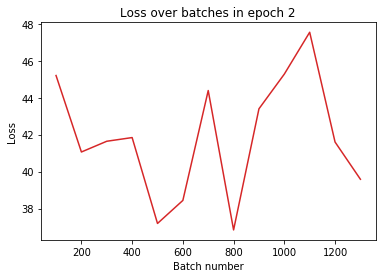

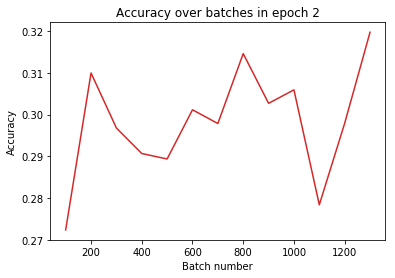

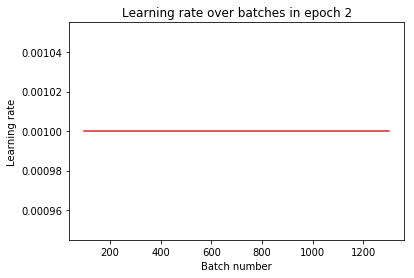

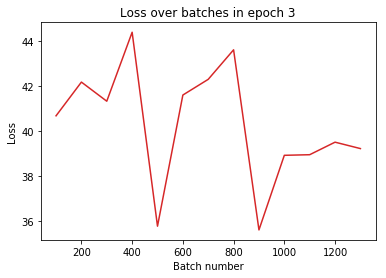

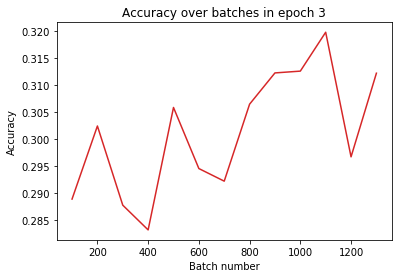

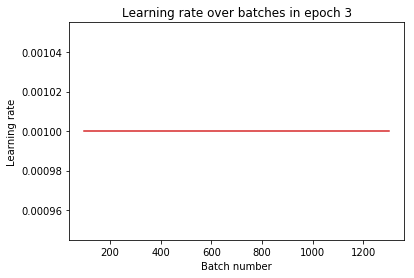

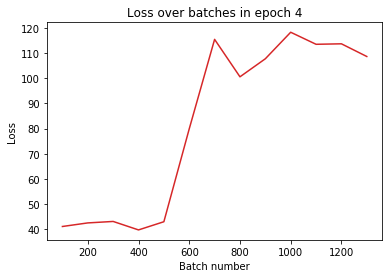

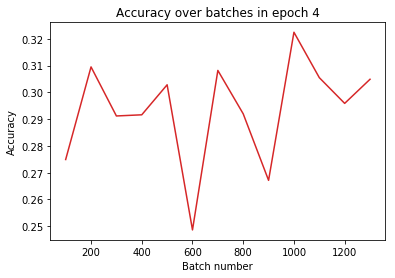

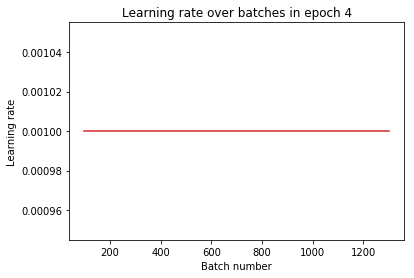

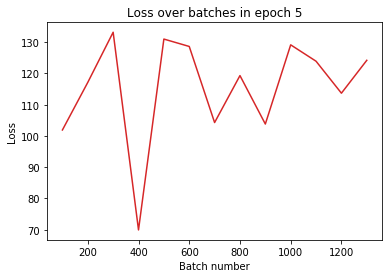

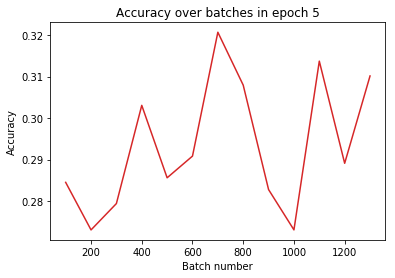

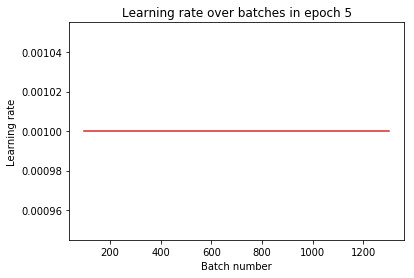

In [4]:
# Run model task 4
tf.reset_default_graph()

with tf.Session() as sess:

  print("Task 4")
  # some hyper-parameters
  # tweak them as you wish
  batch_size=128  # on CPU, use something much smaller e.g. 1-16
  max_length=30
  lr = 0.001
  lr_decay = 0.0  # set to 0.0 when using Adam optimizer (default)
  emb_dim = 64
  mlp_dim = 128

  stats_tracker = StatsTracker()
  # our model
  model = NeuralIBM1Model_T4(
    x_vocabulary=vocabulary_e, y_vocabulary=vocabulary_f,
    batch_size=batch_size, emb_dim=emb_dim, mlp_dim=mlp_dim, session=sess)

  # our trainer
  trainer = NeuralIBM1Trainer_T2_gate(
    model, train_e_path, train_f_path,
    dev_e_path, dev_f_path, dev_wa,
    num_epochs=5, batch_size=batch_size,
    max_length=max_length, lr=lr, lr_decay=lr_decay, session=sess)

  # now first TF needs to initialize all the variables
  print("Initializing variables..")
  sess.run(tf.global_variables_initializer())

  # now we can start training!
  print("Training started..")
  trainer.train(stats_tracker)
    
  test_aer, test_acc = trainer.model.evaluate(
                test_corpus, test_wa)   
  print("Testset accuracy: {}, AER: {}".format(test_acc, test_aer))